In [1]:
import scipy.optimize as op
import numpy as np
import matplotlib.pyplot as plt

def montrer_les_rho(nu_tilde) :
    
    plt.plot ( lam_discr_tilde , nu_tilde , label = "$\\tilde{\\nu}$")

    ## 1 
    Mat_F_1 = np.eye(lam_discr_tilde.shape[0]  ) - 1/(2*np.pi) * dlam/gbar * np.dot ( np.diag ( nu_tilde ) , K_mat_tilde )
    B = 1/(2*np.pi) *  nu_tilde 
    rho_tilde_1 = np.linalg.solve(Mat_F_1, B)
    rho_s_tilde_1 = rho_tilde_1/nu_tilde 

    ## 2 
    Mat_F_1 = np.eye(lam_discr_tilde.shape[0]  ) - 1/(2*np.pi) * dlam/gbar * np.dot ( K_mat_tilde , np.diag ( nu_tilde )  )
    B = 1/(2*np.pi) *  np.full ( lam_discr_tilde.shape[0] , 1  )
    rho_s_tilde_2 = np.linalg.solve(Mat_F_1, B)
    rho_tilde_2 = nu_tilde*rho_s_tilde_2

    plt.plot ( lam_discr_tilde , rho_s_tilde_1 , label = 'Meth 1 : $\\tilde{\\rho_s}$ ')
    plt.plot ( lam_discr_tilde , rho_tilde_1  , label = 'Meth 1 : $\\tilde{\\rho}$')
    plt.plot ( lam_discr_tilde , rho_s_tilde_2 , label = 'Meth 2 : $\\tilde{\\rho_s}$ ')
    plt.plot ( lam_discr_tilde , rho_tilde_2  , label = 'Meth 2 : $\\tilde{\\rho}$')

    plt.legend()
    plt.xlabel("$\\tilde{\\theta}$")
    plt.show()

    plt.plot ( lam_discr_tilde , rho_s_tilde_1 -  rho_s_tilde_2  , label = '$ \\Delta \\tilde{\\rho_s}$ ')
    plt.plot ( lam_discr_tilde , rho_tilde_1  -  rho_tilde_2    , label = '$\\Delta \\tilde{\\rho}$')

    plt.legend()
    plt.xlabel("$\\tilde{\\theta}$")
    plt.show()

import os
import re
import numpy as np
import matplotlib.pyplot as plt

def check_condition(condition, x):
    if isinstance(condition, str):
        # Vérifier si la condition commence par '<'
        if condition.startswith("<"):
            limit = int(condition[1:])  # Extraire la valeur après "<"
            return x < limit  # Retourne True si x est inférieur à la limite
        # Vérifier si la condition commence par '>'
        elif condition.startswith(">"):
            limit = int(condition[1:])  # Extraire la valeur après ">"
            return x > limit  # Retourne True si x est supérieur à la limite
        # Vérifier si la condition est de la forme "[min, max]"
        elif condition[0] == "[" and condition[-1] == "]":
            bounds = condition[1:-1].split(",")  # Séparer par la virgule
            lower = int(bounds[0].strip())  # Extraire et parser le premier nombre
            upper = int(bounds[1].strip())  # Extraire et parser le deuxième nombre
            return lower <= x <= upper  # Retourne True si x est dans l'intervalle
        else:
            raise ValueError("Format de chaîne invalide")
    elif isinstance(condition, (int, float)):  # Si la condition est un int ou float
        return x == condition  # Comparer directement x avec la condition
    else:
        raise ValueError("Condition doit être une chaîne de caractères ou un nombre (int ou float)")

def extract_triples(date, nom, mup=None, T=None, x0=None ,Taille=None):
    triples = {}  # Utiliser un ensemble pour éviter les doublons
    
    # Parcourir les fichiers dans le répertoire spécifié par date
    for filename in os.listdir(date):
        # Vérifier si le nom du fichier correspond au format attendu
        if nom ==  "theta_edge_1.0_ih1" :
            match = re.match(rf"density_expansion_nu_{re.escape(nom)}_([\d.]+)_([\d.]+)\_veff_bord.npz", filename)
            if match:
                file_mup = float(match.group(1))
                file_T = float(match.group(2))
                # Vérifier si les valeurs correspondent aux critères spécifiés
                
                if (mup is None or check_condition(mup, file_mup)) and (T is None or check_condition(T, file_T)):
                    triples[(file_mup, file_T)] = extract_t_times_Taille(date, nom, (file_mup, file_T))
        elif nom == "theta_edge_1.0_ih2" :
            match = re.match(rf"density_expansion_nu_{re.escape(nom)}_([\d.]+)_([\d.]+)_([\d.]+)_([\d.]+)_([\d.]+)\.npz", filename)
            if match:
                file_mup = float(match.group(1))
                file_T = float(match.group(2))
                file_x0 = float(match.group(3))
                file_Taille = float(match.group(4))
                # Vérifier si les valeurs correspondent aux critères spécifiés
                if (mup is None or check_condition(mup, file_mup)) and (T is None or check_condition(T, file_T)) and (x0 is None or check_condition(x0, file_x0)) and (Taille is None or check_condition(Taille, file_Taille)):
                    triples[(file_mup, file_T,file_x0, file_Taille)] = extract_t_times_Taille(date, nom, (file_mup, file_T,file_x0, file_Taille))
    
    return triples

def extract_triples(date, nom, mup=None, T=None, x0=None, Taille=None):
    triples = {}  # Utiliser un dictionnaire pour stocker les résultats
    
    # Parcourir les fichiers dans le répertoire spécifié par 'date'
    for filename in os.listdir(date):
        # Vérifier si le nom du fichier correspond à un format attendu
        if nom == "theta_edge_1.0_ih1":
            # Expression régulière pour capturer les valeurs de mup et T (négatif ou positif)
            match = re.match(rf"density_expansion_nu_{re.escape(nom)}_([-]?\d+\.\d+)_([-]?\d+\.\d+)_veff_bord.npz", filename)
            if match:
                file_mup = float(match.group(1))  # Extraire mup et convertir en float
                file_T = float(match.group(2))    # Extraire T et convertir en float
                
                # Vérifier si les valeurs correspondent aux critères spécifiés
                if (mup is None or check_condition(mup, file_mup)) and (T is None or check_condition(T, file_T)):
                    triples[(file_mup, file_T)] = extract_t_times_Taille(date, nom, (file_mup, file_T))

        elif nom == "theta_edge_1.0_ih2":
            # Expression régulière pour capturer les valeurs de mup, T, x0 et Taille (négatif ou positif)
            match = re.match(rf"density_expansion_nu_{re.escape(nom)}_([-]?\d+\.\d+)_([-]?\d+\.\d+)_([-]?\d+\.\d+)_([-]?\d+\.\d+)_([-]?\d+\.\d+)\.npz", filename)
            if match:
                file_mup = float(match.group(1))    # Extraire mup et convertir en float
                file_T = float(match.group(2))      # Extraire T et convertir en float
                file_x0 = float(match.group(3))     # Extraire x0 et convertir en float
                file_Taille = float(match.group(4)) # Extraire Taille et convertir en float
                
                # Vérifier si les valeurs correspondent aux critères spécifiés
                if (mup is None or check_condition(mup, file_mup)) and \
                   (T is None or check_condition(T, file_T)) and \
                   (x0 is None or check_condition(x0, file_x0)) and \
                   (Taille is None or check_condition(Taille, file_Taille)):
                    triples[(file_mup, file_T, file_x0, file_Taille)] = extract_t_times_Taille(date, nom, (file_mup, file_T, file_x0, file_Taille))

    return triples

def extract_t_times_Taille(date, nom, triple):
    
    t_times_Taille_values = set()  # Utiliser un ensemble pour éviter les doublons
    
    # Construire le motif de recherche pour le nom de fichier
    if nom ==  "theta_edge_1.0_ih1" :
        mup, T = triple
        pattern = rf"density_expansion_nu_{re.escape(nom)}_{mup:.3f}_{T:.3f}_([\d.]+)\.npz"
       
    elif nom ==  "theta_edge_1.0_ih2" :
        mup, T, x0, Taille = triple
        pattern = rf"density_expansion_nu_{re.escape(nom)}_{mup:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_([\d.]+)\.npz"
    # Parcourir les fichiers dans le répertoire spécifié par date
    for filename in os.listdir(date):
        # Vérifier si le nom du fichier correspond au format attendu
        match = re.match(pattern, filename)
        if match:
            t_times_Taille = float(match.group(1))
            t_times_Taille_values.add(t_times_Taille)
    
    return sorted(t_times_Taille_values)



def compare_condition(value, condition):
    """
    Fonction utilitaire pour comparer une valeur avec une condition.
    La condition peut être:
    - Une liste de valeurs : check si value est dans la liste
    - Une fonction lambda ou un string avec des opérateurs (">", "<", etc.)
    """
    if isinstance(condition, list):
        return value in condition
    elif callable(condition):
        return condition(value)
    elif isinstance(condition, str):
        # On supporte les conditions sous forme de string (ex: '>' ou '<')
        if condition == ">":
            return value > 0
        elif condition == "<":
            return value < 0
        elif condition == "=":
            return value == 0
    return False  # Par défaut, ne pas accepter

def extract_triples_2(date, nom, mup=None, T=None, Taille=None,
                    condition_mup=None, condition_T=None, condition_Taille=None):
    """
    Extrait les triples de fichiers en fonction des conditions données.
    Conditions peuvent être une valeur, une liste de valeurs ou une fonction de comparaison.
    """
    triples = {}
    
    # Parcourir les fichiers dans le répertoire spécifié par date
    for filename in os.listdir(date):
        # Vérifier si le nom du fichier correspond au format attendu
        match = re.match(rf"density_expansion_nu_{re.escape(nom)}_([\d.]+)_([\d.]+)_([\d.]+)_([\d.]+)\.npz", filename)
        if match:
            file_mup = float(match.group(1))
            file_T = float(match.group(2))
            file_Taille = float(match.group(3))
            
            # Vérifier les conditions
            if (condition_mup is None or compare_condition(file_mup, condition_mup)) and \
               (condition_T is None or compare_condition(file_T, condition_T)) and \
               (condition_Taille is None or compare_condition(file_Taille, condition_Taille)):
                triples[(file_mup, file_T, file_Taille)] = extract_t_times_Taille(date, nom, (file_mup, file_T, file_Taille))   
    
    return triples

In [2]:
import numpy as np
from scipy.linalg import solve
from scipy.interpolate import interp1d
from scipy.sparse import diags
from scipy.sparse.linalg import inv

# -------------------------------------------------------------------------------------
# Dressing of function f (given as array f_discr, occupation ratio given as n_discr)
# -------------------------------------------------------------------------------------

def f_varphimat(lam_discr, gb):
    L = len(lam_discr)
    def varphi(lam):
        return 2 * gb / (gb**2 + lam**2)
    
    varphimat = np.zeros((L, L))
    
    for i in range(L):
        for j in range(i + 1):
            value = varphi(lam_discr[i] - lam_discr[j])
            varphimat[i, j] = value
            varphimat[j, i] = value
    
    return varphimat

def f_dlam(lam_discr):
    L = len(lam_discr)
    dlam = np.zeros(L)
    for i in range(1, L - 1):
        dlam[i] = 0.5 * (lam_discr[i + 1] - lam_discr[i - 1])
    dlam[0] = 0.5 * (lam_discr[1] - lam_discr[0])
    dlam[-1] = 0.5 * (lam_discr[-1] - lam_discr[-2])
    return dlam

def dress(gb, lam_discr, n_discr, f_discr):
    varphimat = f_varphimat(lam_discr, gb)
    dlam = f_dlam(lam_discr)
    A = np.eye(len(lam_discr)) - (0.5 / np.pi) * varphimat @ np.diag(n_discr) @ np.diag(dlam)
    return solve(A, f_discr)

# -------------------------------------------------------------------------------------
# To evaluate charge density associated with function f
# -------------------------------------------------------------------------------------

def charge_density(gb, lam_discr, n_discr, f_discr):
    L = len(lam_discr)
    def varphi(lam):
        return 2 * gb / (gb**2 + lam**2)

    #lam_discr_g = np.linspace((lam_discr[0]*3 - lam_discr[-1])/2 , lam_discr[0], int(L/2))
    #lam_discr_d = np.linspace(lam_discr[-1], (lam_discr[-1]*3 - lam_discr[0])/2 int(L/2))
    #lam_discr_exp = np.concatenate([lam_discr_g ,lam_discr , lam_discr_d]) 
    #lam_discr_exp = np.linspace((lam_discr[0]*3 - lam_discr[-1])/2, (lam_discr[-1]*3 - lam_discr[0])/2,  2*L ))
    lam_discr_exp = np.linspace( lam_discr[0], lam_discr[-1]*2 - lam_discr[0],  2*L )
    varphimat = np.zeros((2*L, 2*L))
    for i in range(L):
        for j in range(i + 1):
            value = varphi(lam_discr[i] - lam_discr[j])
            varphimat[i, j] = value
            varphimat[j, i] = value
    
    dlam_exp = f_dlam(lam_discr_exp)
    zeros_array = np.array([0] * L)
    n_discr_exp = np.concatenate([n_discr, zeros_array], axis=0)
    A = np.eye(2*L) - (0.5 / np.pi) * varphimat @ np.diag(n_discr_exp) @ np.diag(dlam_exp)
    f_discr_exp = np.ones(2*L)
    dressed_f = solve(A, f_discr_exp)[:L]
    dlam = f_dlam(lam_discr)
    return (0.5 / np.pi) * np.dot(dlam, np.diag(n_discr) @ dressed_f)

# -------------------------------------------------------------------------------------
# Solve Yang-Yang equation
# -------------------------------------------------------------------------------------

def fun1(z):
    if z > 0:
        return np.log(1 + np.exp(-z))
    else:
        return np.log(1 + np.exp(z)) - z

def fun2(z):
    if z < 0:
        return 1 / (1 + np.exp(z))
    else:
        return np.exp(-z) / (1 + np.exp(-z))

def yangyang(gb, beta, lam_discr):
    L = len(lam_discr)
    def varphi(lam):
        return 2 * gb / (gb**2 + lam**2)
    
    varphimat = np.zeros((L, L))
    for i in range(L):
        for j in range(i + 1):
            value = varphi(lam_discr[i] - lam_discr[j])
            varphimat[i, j] = value
            varphimat[j, i] = value
    
    dlam = f_dlam(lam_discr)
    bare_E = 0.5 * beta[2] * lam_discr**2 + beta[1] * lam_discr + beta[0]
    eps = bare_E.copy()
    n = np.array([fun2(e) for e in eps])
    
    diff = 1.0
    while diff > 1e-12:
        old_n = n.copy()
        eps = bare_E - (0.5 / np.pi) * varphimat @ np.diag([fun1(e) for e in eps]) @ dlam
        n = np.array([fun2(e) for e in eps])
        diff = np.linalg.norm(n - old_n)
    
    eps = bare_E - (0.5 / np.pi) * varphimat @ np.diag([fun1(e) for e in eps]) @ dlam
    n = np.array([fun2(e) for e in eps])
    return n

import numpy as np
from scipy.interpolate import interp1d

def eval_density(x1, x2, gb, theta_tab, n_fun, ratio_m_hbar):
    L = len(x1)
    dens = np.zeros((2, 2 * L))  # Matrice de densité
    
    # Interpolation/extrapolation pour x2
    f2 = interp1d(x2, theta_tab, kind='linear', fill_value="extrapolate")
    
    # Interpolation/extrapolation pour x1
    f1 = interp1d(x1, theta_tab, kind='linear', fill_value="extrapolate")
    
    # La densité pour les premiers et derniers points est zéro
    dens[0, 0] = x1[0]
    dens[1, 0] = 0
    dens[0, L] = x2[-1]
    dens[1, L] = 0
    
    # Calcul des densités pour x1
    for j in range(1, L):  # Parcours de 1 à L-1 (équivalent Julia 2:L)
        thet1 = theta_tab[j]
        if x1[j] < x2[0]:
            thet2 = theta_tab[0]
        else:
            thet2 = f2(x1[j])
        
        lam_discr = np.linspace(thet2, thet1, 600)  # LinRange équivalent
        n_discr = n_fun(lam_discr)
        
        dens[0, j] = x1[j]
        dens[1, j] = ratio_m_hbar * charge_density(gb, lam_discr, n_discr, np.ones(len(lam_discr)))
    
    # Calcul des densités pour x2 sans symétrie
    for j in range(L - 1):  # Parcours de 0 à L-2 (équivalent Julia 1:L-1)
        thet1 = theta_tab[j]
        if x2[j] > x1[-1]:
            thet2 = theta_tab[-1]
        else:
            thet2 = f1(x2[j])
        
        lam_discr = np.linspace(thet1, thet2, 600)  # LinRange équivalent
        n_discr = n_fun(lam_discr)
        
        dens[0, 2 * L - 1 - j] = x2[j]
        dens[1, 2 * L - 1 - j] = ratio_m_hbar * charge_density(gb, lam_discr, n_discr, np.ones(len(lam_discr)))
    
    # Trier les densités selon les positions
    sorted_indices = np.argsort(dens[0, :])
    dens_sorted = dens[:, sorted_indices]
    
    return dens_sorted


In [3]:
import numpy as np

def DeltaMat(theta_discr, gbar):
    L = len(theta_discr)
    
    def varphi(theta):
        return 2 * gbar / (gbar**2 + theta**2)
    
    varphimat = np.zeros((L, L))
    
    for i in range(L):
        for j in range(i + 1):
            value = varphi(theta_discr[i] - theta_discr[j])
            varphimat[i, j] = value
            varphimat[j, i] = value  # Symétrie de la matrice
    
    return varphimat


In [4]:
def Delta(theta_discr):
    L = len(theta_discr)
    dtheta = np.zeros(L)
    
    for i in range(1, L - 1):
        dtheta[i] = 0.5 * (theta_discr[i + 1] - theta_discr[i - 1])
    
    dtheta[0] = 0.5 * (theta_discr[1] - theta_discr[0])
    dtheta[L - 1] = 0.5 * (theta_discr[L - 1] - theta_discr[L - 2])
    
    return dtheta


In [5]:
def montrer_les_rho(theta_discr, nu_discr, gbar):
    L = len(theta_discr)
    
    # Calcul de varphimat et dtheta
    varphimat = DeltaMat(theta_discr, gbar)
    dtheta = Delta(theta_discr)
    
    # Initialisation du plot
    plt.figure(figsize=(10, 6))
    plt.xlabel(r"$\tilde{\theta}$")
    plt.ylabel("f")
    
    # Plot de nu_tilde
    plt.plot(theta_discr, nu_discr, label=r"$\tilde{\nu}$")
    
    # Méthode 0
    rho_s_0 = 0.5 / np.pi * dress(gbar, theta_discr, nu_discr, np.ones(L))
    rho_0 = nu_discr * rho_s_0
    
    # Méthode 1
    Mat_F_1 = np.eye(L) - (1 / (2 * np.pi)) * np.diag(dtheta) @ np.diag(nu_discr) @ varphimat
    B_1 = (1 / (2 * np.pi)) * nu_discr
    rho_1 = np.linalg.solve(Mat_F_1, B_1)
    rho_s_1 = rho_1 / nu_discr

    # Méthode 2
    Mat_F_2 = np.eye(L) - 0.5 / np.pi * varphimat @ np.diag(nu_discr) @ np.diag(dtheta)
    B_2 = (1 / (2 * np.pi)) * np.ones(L)
    rho_s_2 = np.linalg.solve(Mat_F_2, B_2)
    rho_2 = nu_discr * rho_s_2
    
    # Plot des résultats de la méthode 0
    plt.plot(theta_discr, rho_s_0, label=r"Méthode 0 : $\tilde{\rho_s}= \frac{1}{2\pi}$")
    plt.plot(theta_discr, rho_0, label=r"Méthode 0 : $\tilde{\rho} = \tilde{\nu} \cdot \tilde{\rho_s}$")
    
    # Plot des résultats de la méthode 1
    plt.plot(theta_discr, rho_1, label=r"Méthode 1 : $\tilde{\rho}= \frac{\tilde{\nu}}{2\pi} ( 1 + \tilde{\Delta} \cdot \tilde{\rho})$")
    plt.plot(theta_discr, rho_s_1, label=r"Méthode 1 : $\tilde{\rho_s} = \frac{\tilde{\rho}}{\tilde{\nu}}$")
    
    # Plot des résultats de la méthode 2
    plt.plot(theta_discr, rho_s_2, label=r"Méthode 2 : $\tilde{\rho_s}= \frac{1}{2\pi}$")
    plt.plot(theta_discr, rho_2, label=r"Méthode 2 : $\tilde{\rho} = \tilde{\nu} \cdot \tilde{\rho_s}$")
    
    # Affichage de la légende
    plt.legend(loc="upper right")
    plt.grid()
    plt.show()

    # Optionnel : Calcul des différences entre les méthodes
    diff_rho_s = rho_s_1 - rho_s_2
    diff_rho = rho_1 - rho_2
    plt.figure(figsize=(10, 6))
    plt.plot(theta_discr, diff_rho_s, label=r"$\Delta \tilde{\rho_s} 1 - 2 $")
    plt.plot(theta_discr, diff_rho, label=r"$\Delta \tilde{\rho} 1 - 2 $")

    plt.plot(theta_discr, rho_s_0 - rho_s_1, label=r"$\Delta \tilde{\rho_s} 0 - 1 $")
    plt.plot(theta_discr, rho_0 - rho_1, label=r"$\Delta \tilde{\rho} 0 - 1 $")
    plt.xlabel(r"$\tilde{\theta}$")
    plt.ylabel(r"$\Delta$")
    plt.legend(loc="upper right")
    plt.grid()
    plt.show()

In [6]:
date = "2024-04-24"
date = "2025-01-23"
date = "2025-01-26"
date = "2025-01-27"
nom1 = "theta_edge_1.0_ih1"
nom2 = "theta_edge_1.0_ih2"

mup = None #64.676
T = 559.424
x0 = '>18'
Taille = None #28.07# None#22.176#None#22.14#None#22.825#27.866


# Extraction des triples possibles
triples = extract_triples(date, nom2, mup, T, x0, Taille)
print("Triples key possibles:", triples.keys())
triple = list(triples.keys())[0]
mu , T , x0 , Taille = triple


Triples key possibles: dict_keys([(64.676, 559.424, 18.339, 22.089)])


In [37]:
import os
import scipy.io as sp


def corresp(dossier ,  nom = nom2 , triple = triple , exp = '.npz'):
    # Demander à l'utilisateur de saisir une série de lettres
    #entree = input("Entrez une série de lettres : ").lower()
    index_last_underscore = nom.rfind('_')
    mu , T , x0 , Taille = triple
    entree = f"veff_bord_discr_{nom[index_last_underscore+1:]}_{mu}_{T}"
    entree = f"nu_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}"
    entree = f"bord1_{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}"
    entree = f"bord1_{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}"
    entree = f"density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}"
    entree = f"{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
    #entree = f"Pi_{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
    #entree = f"Pi_{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
    #entree = f"theta_discr_exp_{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
    #entree = f"rho_{nom[:index_last_underscore]}_discr_moy_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}"
    #entree = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}"
    print (entree)
    
     # Lister les fichiers .mat dans le répertoire spécifié
    fichiers = [f for f in os.listdir(dossier) if (f.endswith(exp) and entree.lower() in f.lower()) ]
    #fichiers = [f for f in os.listdir(dossier) if (f.endswith(exp) and entree in f) ]


    if not fichiers:
        print(f"Aucun fichier {exp} trouvé dans le répertoire.")
        return
    
    if fichiers:
        print("Les éléments qui correspondent à votre entrée sont :")
        for item in fichiers:
            print(item)
    else:
        print(f"Aucune correspondance trouvée pour '{entree}'.")

# Exemple d'appel de la fonction
dossier = date   # Remplacez ceci par le chemin de votre répertoire contenant les fichiers .mat
corresp(dossier , nom  = nom2)


theta_edge_1.0_ih2_64.676_559.424_18.339.npz
Les éléments qui correspondent à votre entrée sont :
theta_edge_1.0_ih2_64.676_559.424_18.339.npz


In [11]:
import numpy as np
from scipy.interpolate import interp1d

index_last_underscore = nom2.rfind('_')
theta_discr = np.load(f"{date}/theta_discr_{nom2[index_last_underscore+1:]}.npz")

filename = f"{date}/density_expansion_nu_{nom1}_{mu:.3f}_{T:.3f}_veff_bord.npz"
print ( 'filename =' ,filename )
x_bord , y_bord = np.load(filename)

Temp_bord = 18

# Fonction d'interpolation linéaire
def LinearInterpolation(x, y):
    return interp1d(x, y, kind='linear', fill_value="extrapolate")

# Interpolation linéaire
x_fun = LinearInterpolation(theta_discr, x_bord)  # Unité (µm/ms)
theta_fun = LinearInterpolation(x_bord, theta_discr)

# Calcul des limites x1 et x2
x_1 = (x0 - Taille / 2) / Temp_bord
x_2 = (x0 + Taille / 2) / Temp_bord

# Calcul des valeurs theta_1 et theta_2
theta_1 = theta_fun(x_1)
theta_2 = theta_fun(x_2)

# Calcul du maximum de |theta_1| et |theta_2|
max_abs_theta = max(20, abs(theta_1), abs(theta_2))

# Génération des bords pour theta_bord1 et theta_bord2
theta_bord1 = np.linspace(-max_abs_theta, theta_1, 100)
x1_bord1 = np.full(theta_bord1.shape, x_1)

# Génération de theta_bord2 et calcul de x1_bord2
theta_bord2 = np.linspace(theta_1 + 0.0000001, theta_2, 100)
L = len(theta_bord2)
x1_bord2 = np.zeros(L)

for i in range(L):
    x1_bord2[i] = x_fun(theta_bord2[i])

# Concaténation des bords pour theta_discr et x1
theta_discr_exp = np.concatenate([theta_bord1, theta_bord2], axis=0)
x1 = np.concatenate([x1_bord1, x1_bord2], axis=0) * Temp_bord/ Taille

# Calcul de x2
x2 = np.full(theta_discr.shape, x_2) * Temp_bord/ Taille

# Affichage des résultats (facultatif)
#print("theta_discr_exp:", theta_discr_exp)
#print("x1:", x1)
#print("x2:", x2)


filename = 2025-01-27/density_expansion_nu_theta_edge_1.0_ih1_64.676_559.424_veff_bord.npz


filename = 2025-01-27/veff_bord_discr_ih2_64.676_559.424.npz
filename = 2025-01-27/nu_discr_ih2_64.676_559.424.npz
filename = 2025-01-27/bord1_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz
filename = 2025-01-27/bord2_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz
filename = 2025-01-27/density_expansion_nu_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz
200 200


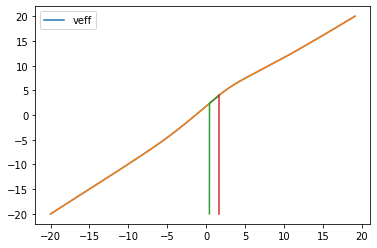

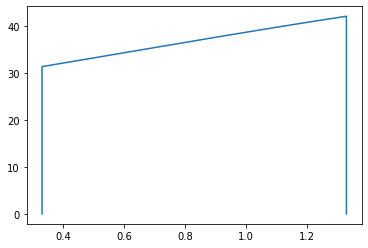

In [12]:

filename = f"{date}/veff_bord_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz"
print ( 'filename =' ,filename )
veff_bord_discr = np.load(filename)
filename = f"{date}/nu_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz"
print ( 'filename =' ,filename )
nu_discr = np.load(filename)



filename = f"{date}/bord1_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
print ( 'filename =' ,filename )
bord1 = np.load(filename)
filename = f"{date}/bord2_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
print ( 'filename =' ,filename )
bord2 = np.load(filename)

filename = f"{date}/density_expansion_nu_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
print ( 'filename =' ,filename )
x_exp , y_exp = np.load(filename)



print( len(bord1) , len(theta_discr)  )
plt.plot(veff_bord_discr , theta_discr , label = "veff" )
plt.plot(x_bord, theta_discr)
plt.plot(bord1*Taille/Temp_bord , theta_discr_exp)
plt.plot(bord2*Taille/Temp_bord , theta_discr_exp)
plt.legend()
plt.show()

plt.plot(x_exp , y_exp )
plt.show()

nu0 = np.load(f"{date}/nu_discr_{nom1[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz" ) 

#x_exp = x_exp[:int(len(x_exp)/2)]

In [13]:
theta_veff_fun = LinearInterpolation(veff_bord_discr, theta_discr) 
nu_fun = LinearInterpolation(theta_discr , nu_discr)
mat_nu = np.array([ np.where(  theta_discr <theta_veff_fun(v),  nu_discr , 0 ) for v in veff_bord_discr])
print(mat_nu.size , mat_nu)

40000 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.02707484 0.         0.         ... 0.         0.         0.        ]
 [0.02707484 0.02928658 0.         ... 0.         0.         0.        ]
 ...
 [0.02707484 0.02928658 0.03157988 ... 0.         0.         0.        ]
 [0.02707484 0.02928658 0.03157988 ... 0.03157988 0.         0.        ]
 [0.02707484 0.02928658 0.03157988 ... 0.03157988 0.02928658 0.        ]]


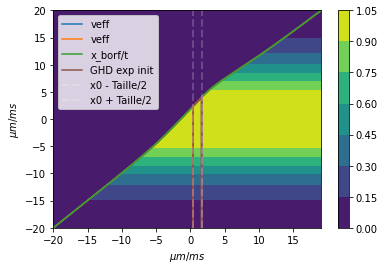

In [14]:
#plt.imshow(mat_nu, cmap='gray', interpolation='none')  # 'gray' pour l'échelle de gris
X, Y = np.meshgrid(veff_bord_discr, theta_discr)
# La couleur sera déterminée par log(rho + 1e-9)

plt.contourf( X, Y,   mat_nu.T, cmap='viridis')
plt.plot(veff_bord_discr , theta_discr , label = "veff" )
plt.colorbar()  # Ajouter une barre de couleur pour l'échelle des valeurs
#plt.show()
plt.plot(veff_bord_discr , theta_veff_fun(veff_bord_discr) , label = "veff" )
plt.plot(x_bord, theta_discr , label = "x_borf/t")
plt.plot(bord1*Taille/Temp_bord , theta_discr_exp)
plt.plot(bord2*Taille/Temp_bord , theta_discr_exp)
plt.plot(x_exp*Taille/Temp_bord , np.concatenate([theta_discr_exp, theta_discr_exp], axis=0) , label = "GHD exp init")
plt.vlines(x_1, min(theta_discr), max(theta_discr), colors='w', label="x0 - Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
plt.vlines(x_2, min(theta_discr), max(theta_discr), colors='w', label="x0 + Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
#plt.xlim([0,2])
plt.xlabel(r"$\mu m/ms$")
plt.ylabel(r"$\mu m/ms$")
plt.legend()
plt.show()

In [15]:
import numpy as np

def integ(x, y, tab, axes=(0,)):
    """
    Calcule l'intégrale discrète sur une ou plusieurs dimensions.

    Parameters:
    - x: numpy array, coordonnées discrètes de la première dimension.
    - y: numpy array, coordonnées discrètes de la deuxième dimension (ou autre).
    - tab: numpy array, tableau de valeurs à intégrer.
    - axes: tuple of int, axes sur lesquels effectuer l'intégration.

    Returns:
    - Résultat de l'intégration (scalaire ou tableau réduit).
    """
    # Assurez-vous que les axes sont sous forme de tuple
    if isinstance(axes, int):
        axes = (axes,)

    # Intégration séquentielle sur les axes spécifiés
    result = tab.copy()
    for axis in sorted(axes):
        if axis == 0:
            dx = np.diff(x)  # Différences des x
            weights = np.append(dx, dx[-1])  # Ajouter le dernier poids pour le bord
            result = np.sum(result * weights[:, None], axis=axis)  # Poids le long de l'axe 0
        elif axis == 1:
            dy = np.diff(y)  # Différences des y
            weights = np.append(dy, dy[-1])  # Ajouter le dernier poids pour le bord
            result = np.sum(result * weights[None, :], axis=axis)  # Poids le long de l'axe 1

    return result


def f_mat_nu_bord(v , theta , veff_bord_discr = veff_bord_discr , theta_discr = theta_discr , nu = nu0 , v1 = bord1*Taille/Temp_bord , v2 = bord1*Taille/Temp_bord , theta_discr_exp = theta_discr_exp ) :
    
    import numpy as np
    from scipy.interpolate import RegularGridInterpolator
    from scipy.interpolate import interp1d
    
    f_nu = interp1d(theta_discr, nu , kind='linear', bounds_error=False, fill_value="extrapolate")
    f_theta_discr_exp_1 = interp1d(bord1*Taille/Temp_bord, theta_discr_exp, kind='linear', bounds_error=False, fill_value="extrapolate")
    f_theta_discr_exp_2 = interp1d(bord2*Taille/Temp_bord, theta_discr_exp, kind='linear', bounds_error=False, fill_value="extrapolate")

    v_min = min(np.min ( v1 ) ,np.min ( v2)) 
    v_max = min(np.max ( v1 ) ,np.max ( v2))

    if v < v_min or v > v_max : return 0

    theta_min = min(theta_discr)
    theta_max = f_theta_discr_exp_1(v)
    if v < min(v2)  :        
        if theta > theta_max : return 0 
        return f_nu(theta) 
    else : 
        theta_min = f_theta_discr_exp_2(v)
        theta_min = f_theta_discr_exp_2(v)
        if (theta < theta_min) or (theta > theta_max) : return 0 
        return f_nu(theta) 

In [16]:
import numpy as np

# Définir les constantes
hbar = 1.05457182e-25   # um^2.kg/ms
mass =  1.44e-25        # kg (masse du Rubidium 87)
kB = 1.380649e-26       # um^2.ms^-2.kg.nK^{-1}
a3D = 5.3e-3            # um
om_perp = 2 * np.pi * 2.56  # kHz (fréquence transverse)

# Calculer les constantes dérivées
g = 2 * hbar * a3D * om_perp        # force de répulsion effective 1D
c = mass / hbar**2 * g              # um^{-1}
gbar = g / hbar

print(gbar)


0.17050051649562528


[True, True, True, False, False, False, True]
filename = 2025-01-27/bord1_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz
filename = 2025-01-27/bord2_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz


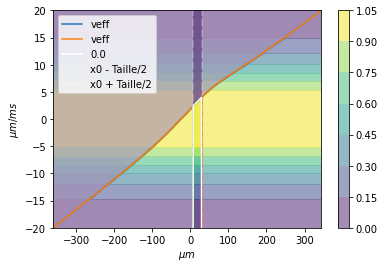

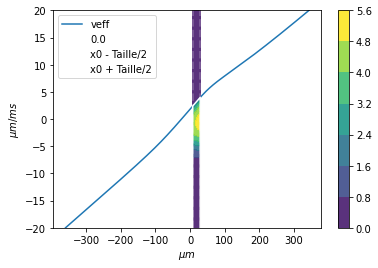

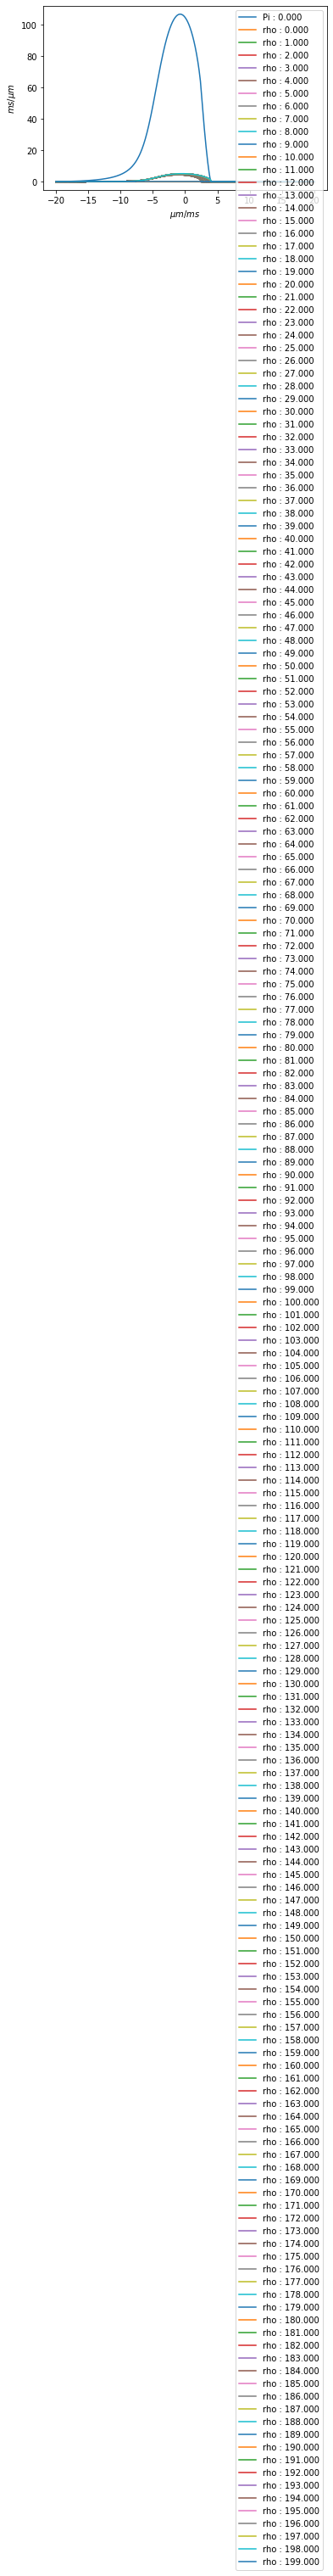

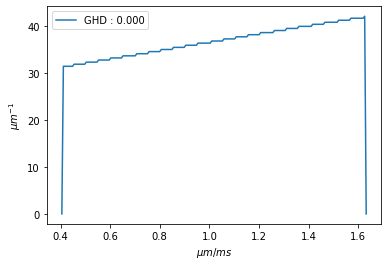

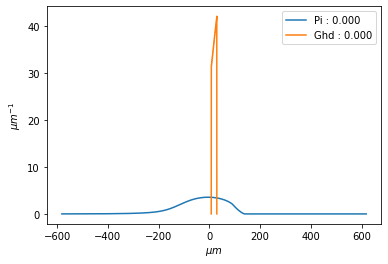

filename = 2025-01-27/bord1_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_1.000.npz
filename = 2025-01-27/bord2_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_1.000.npz


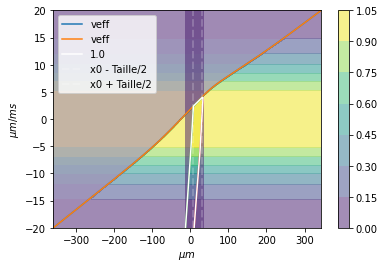

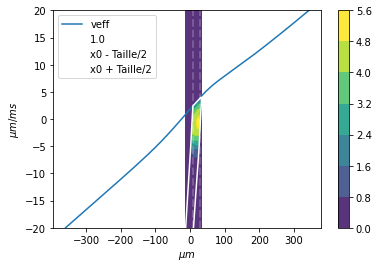

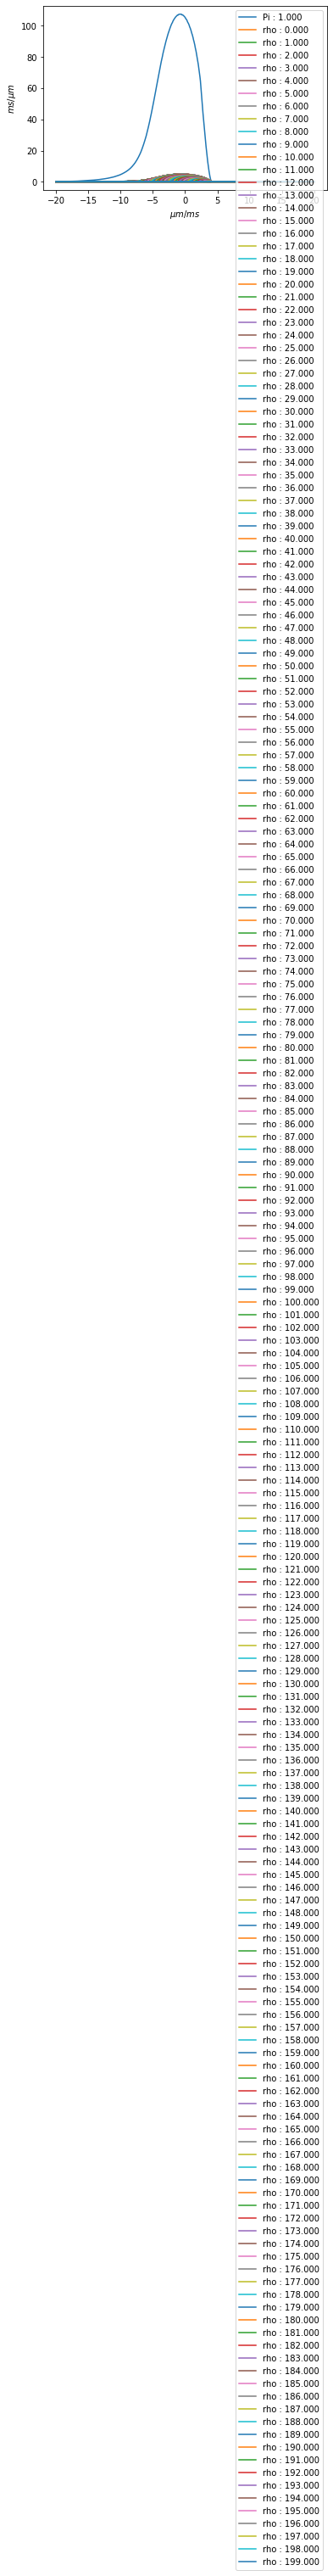

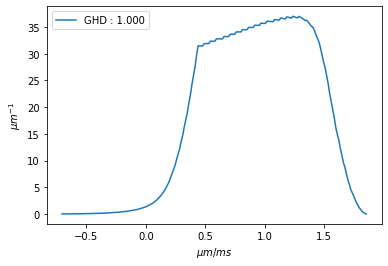

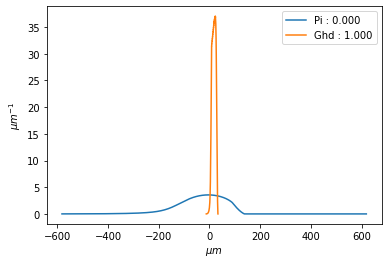

filename = 2025-01-27/bord1_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_10.000.npz
filename = 2025-01-27/bord2_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_10.000.npz


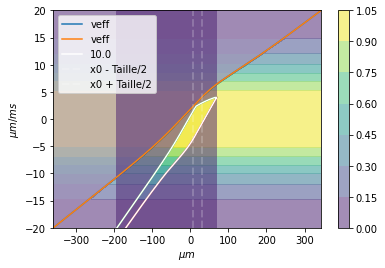

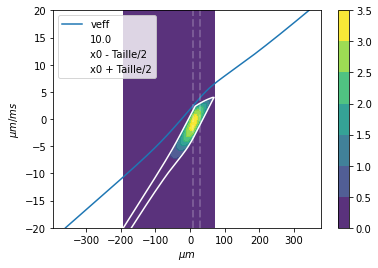

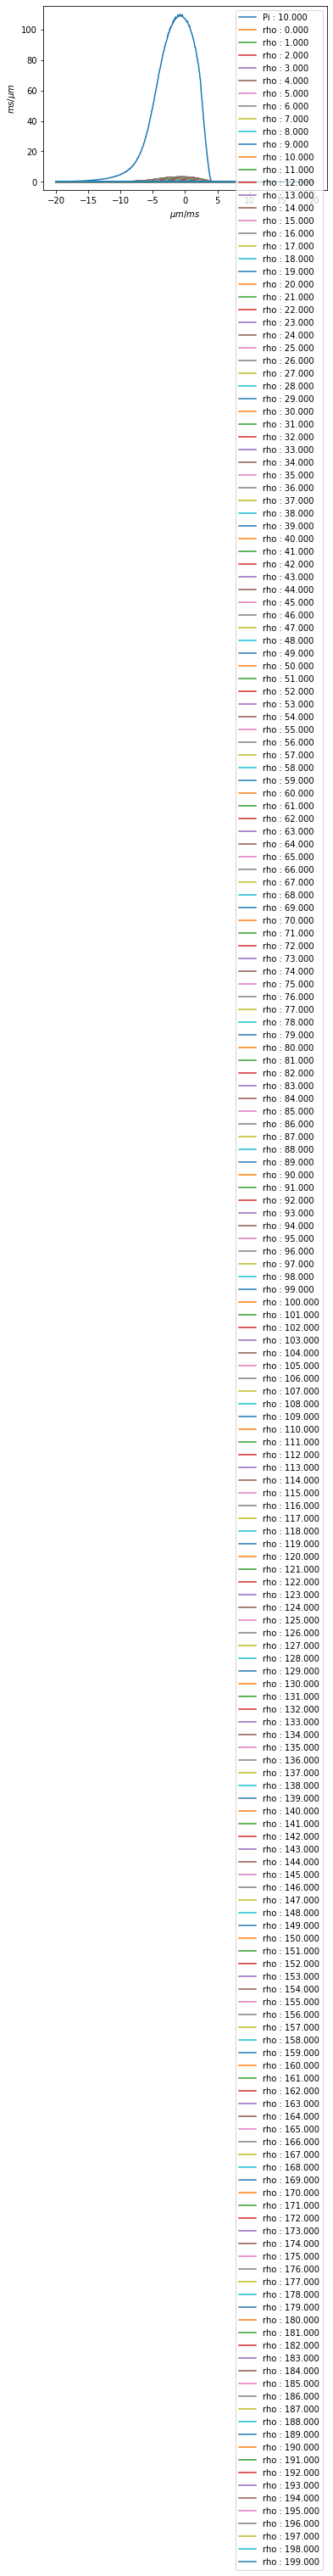

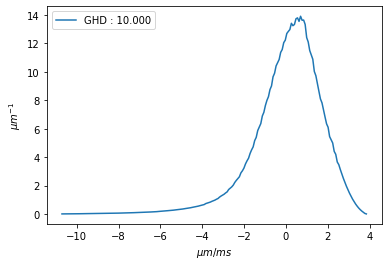

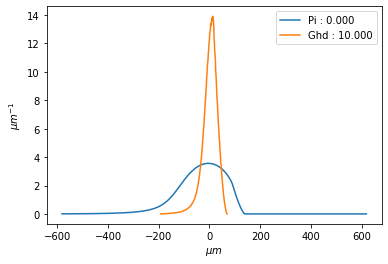

filename = 2025-01-27/bord1_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_30.000.npz
filename = 2025-01-27/bord2_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_30.000.npz


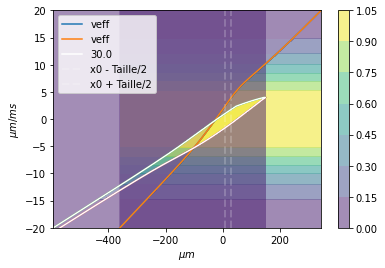

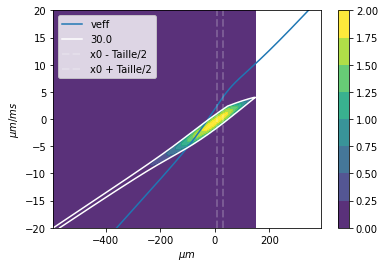

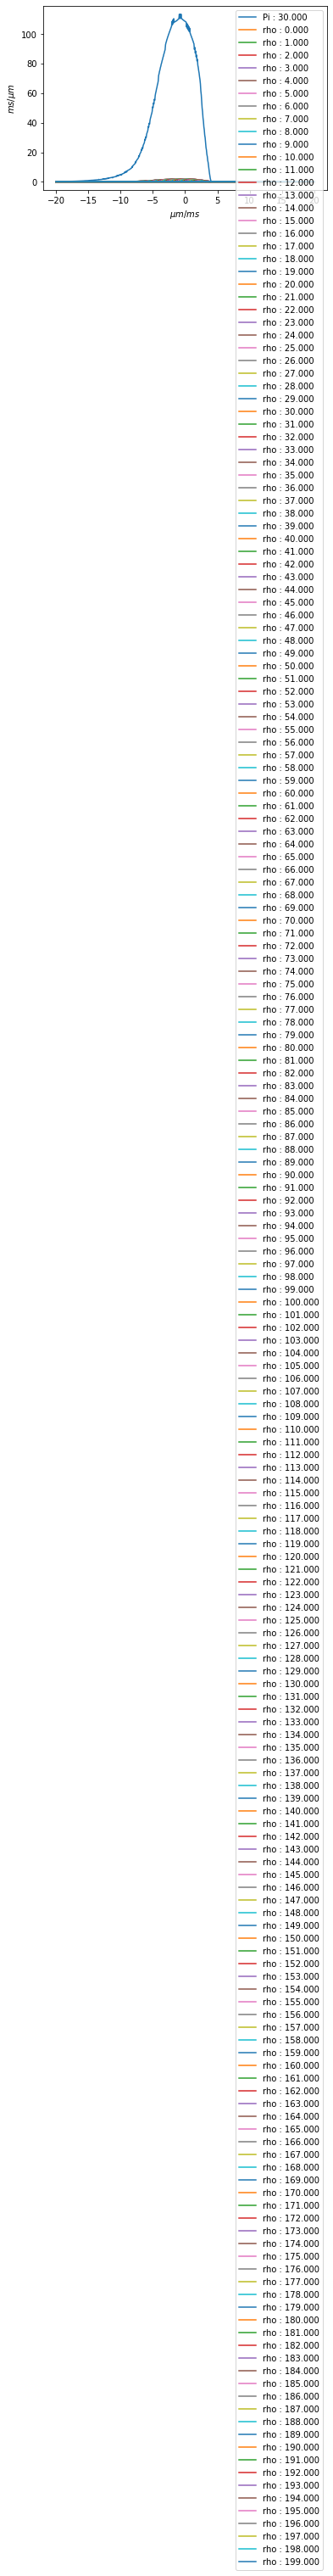

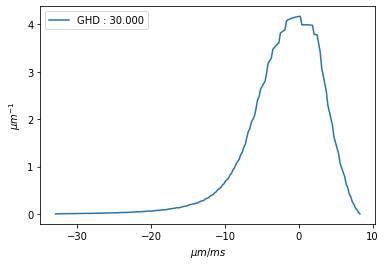

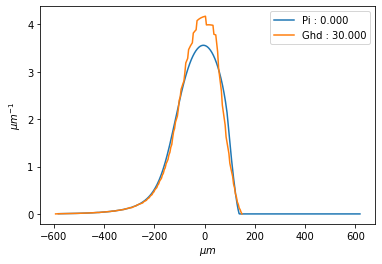

In [29]:
PI , GHD , N  = [] , [] , [] 
liste_t = np.array([0.000 , 1.000 , 10.000 , 11.000 , 20.000 , 21.000 , 30.000 ])
mask = (liste_t >= 0) & (liste_t <= 30)
mask = [ t in np.array([0.000 , 1.000 , 10.000 , 30.000]) for t in liste_t ]
print(mask)
for t in liste_t[mask] :
    filename = f"{date}/bord1_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print ( 'filename =' ,filename )
    bord1 = np.load(filename)
    filename = f"{date}/bord2_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print ( 'filename =' ,filename )
    bord2 = np.load(filename)
    
    veff_bord_discr_exp_2 = np.linspace(min(bord1[0] , bord2[0]) , max(bord2[-1] , bord1[-1]), 200)*Taille/Temp_bord
    theta_discr_exp_2 = np.linspace(theta_discr[0] , theta_discr[-1], 600)
    mat_nu_bord = np.array([
        np.array([f_mat_nu_bord(v, theta , v1 = bord1*Taille/Temp_bord , v2 = bord1*Taille/Temp_bord ) for theta in theta_discr_exp_2])
        for v in veff_bord_discr_exp_2
    ])  
    vmin=0
    vmax=1
    X, Y = np.meshgrid(veff_bord_discr*Temp_bord, theta_discr)
    plt.contourf( X, Y,   np.array([nu0 for v in veff_bord_discr]).T, cmap='viridis' , vmin=vmin, vmax=vmax , alpha = 0.3)
    plt.contourf( X, Y,   mat_nu.T, cmap='viridis' , vmin=vmin, vmax=vmax , alpha = 0.3)
    X, Y = np.meshgrid(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2)
    plt.contourf( X, Y,   mat_nu_bord.T, cmap='viridis' , vmin=vmin, vmax=vmax, alpha = 0.5)
    plt.plot(veff_bord_discr*Temp_bord , theta_discr , label = "veff" )
    plt.colorbar()  # Ajouter une barre de couleur pour l'échelle des valeurs
    #plt.show()

    plt.plot(veff_bord_discr*Temp_bord , theta_veff_fun(veff_bord_discr) , label = "veff" )
    
    plt.plot(bord1*Taille, theta_discr_exp)
    plt.plot(bord2*Taille , theta_discr_exp)
    plt.plot(np.concatenate([bord1, np.flip(bord2)] , axis=0)*Taille, np.concatenate([theta_discr_exp, np.flip(theta_discr_exp)], axis=0) , color = "white" , label = str(t) )
    
    plt.vlines(x_1*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 - Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    plt.vlines(x_2*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 + Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.xlim([0,2])
    plt.xlabel(r"$\mu m$")
    plt.ylabel(r"$\mu m/ms$")
    plt.legend()
    plt.show()

    mat_rho_bord = np.array([0.5 / np.pi * nu* mass/hbar* dress(gbar, theta_discr_exp_2, nu, np.ones(len(theta_discr_exp_2))) for nu in mat_nu_bord ]  )

    #plt.contourf( X, Y,   mat_rho.T, cmap='viridis' , alpha = 0.5)
    plt.contourf( X, Y,   mat_rho_bord.T, cmap='viridis' , vmin=0, vmax=np.max(mat_rho_bord) , alpha = 0.9)
    plt.plot(veff_bord_discr*Temp_bord , theta_discr , label = "veff" )
    plt.colorbar()  # Ajouter une barre de couleur pour l'échelle des valeurs
    plt.plot(np.concatenate([bord1, np.flip(bord2)], axis=0)*Taille, np.concatenate([theta_discr_exp, np.flip(theta_discr_exp)], axis=0) , color = "white" , label = str(t) )
    
    plt.vlines(x_1*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 - Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    plt.vlines(x_2*Temp_bord, min(theta_discr), max(theta_discr), colors='w', label="x0 + Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.xlim([0,2])
    plt.xlabel(r"$\mu m$")
    plt.ylabel(r"$\mu m/ms$")
    plt.legend()
    plt.show()

    Pi = integral_axis1 = integ(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2, mat_rho_bord, axes=(0,))
    Ghd = integral_axis1 = integ(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2, mat_rho_bord, axes=(1,))
    nat = integral_axis1 = integ(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2, mat_rho_bord, axes=(0,1))

    PI.append(Pi)
    GHD.append(Ghd)
    N.append(nat)

    plt.plot(theta_discr_exp_2 , Pi , label = f"Pi : {t:.3f}") 
    for i , rho in enumerate(mat_rho_bord) :
        plt.plot(theta_discr_exp_2 , rho , label = f"rho : {i:.3f}") 
    plt.xlabel(r"$\mu m/ms$")
    plt.ylabel(r"$ms/\mu m$")
    plt.legend()
    plt.show()

    plt.plot(veff_bord_discr_exp_2 , Ghd , label = f"GHD : {t:.3f}") 
    plt.xlabel(r"$\mu m/ms$")
    plt.ylabel(r"${\mu m}^{-1}$")
    plt.legend()
    plt.show()

    plt.plot(theta_discr_exp_2*liste_t[-1]+x0, PI[0]/liste_t[-1] , label = f"Pi : {0:.3f}") 
    plt.plot(veff_bord_discr_exp_2*Temp_bord, Ghd , label = f"Ghd : {t:.3f}") 
    plt.xlabel(r"$\mu m$")
    plt.ylabel(r"${\mu m}^{-1}$")
    plt.legend()
    plt.show()

18


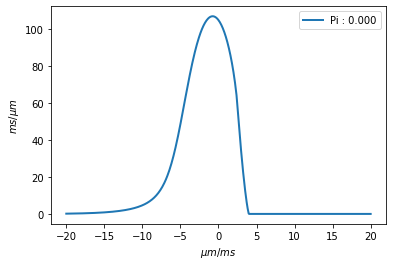

In [19]:
Pi = integral_axis1 = integ(veff_bord_discr_exp_2*Temp_bord, theta_discr_exp_2, mat_rho_bord, axes=(0,))

plt.plot(theta_discr_exp_2 , Pi , label = f"Pi : {t:.3f}",linewidth=2 , ) 
#for i , rho in enumerate(mat_rho_bord) :plt.plot(theta_discr_exp_2 , rho*Taille , label = f"rho : {i:.3f}", linestyle='--', alpha = 0.01) 

v = x0/Temp_bord

print(Temp_bord)

nu = np.array([f_mat_nu_bord(v, theta , v1 = bord1*Taille/Temp_bord , v2 = bord1*Taille/Temp_bord ) for theta in theta_discr_exp_2])
rho = 0.5 / np.pi * nu* mass/hbar* dress(gbar, theta_discr_exp_2, nu, np.ones(len(theta_discr_exp_2)))

#plt.plot(theta_discr_exp_2 , rho*Taille , label = f"rho : {t:.3f}",linewidth=2 , color = 'red') 
plt.xlabel(r"$\mu m/ms$")
plt.ylabel(r"$ms/\mu m$")
plt.legend()
plt.show()

In [20]:
import numpy as np

# Assuming `new_date`, `nom`, `index_last_underscore`, `mup`, `kB`, `T`, and `x0` are defined beforehand
nom = 'theta_edge_1.0_ih2'
index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
filename = f"{date}/rho_bon_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
# Save the array to an NPZ file
np.savez(filename, rho)

# Print a confirmation message
print(f"saved : {filename}")

filename = f"{date}/theta_discr_exp_2_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
# Save the array to an NPZ file
np.savez(filename, np.array(theta_discr_exp_2))

print(len(theta_discr_exp_2))
theta_discr_exp_3 = np.load(filename)
print(len(theta_discr_exp_3) , theta_discr_exp_3)
# Print a confirmation message
print(f"saved : {filename}")


# Pour inspecter le contenu de l'objet npz
loaded_data = np.load(filename)
print(loaded_data.files)  # Liste des clés du fichier npz
#print(loaded_data['arr_0'])  # Affiche le contenu de 'arr_0'
#print(np.load(filename)['arr_0'])


filename = f"{date}/Pi_2_{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
np.savez(filename, Pi)
print(f"saved : {filename}")

print(len(theta_discr_exp_2))

print(len(Pi))

saved : 2025-01-27/rho_bon_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz
600
1 NpzFile '2025-01-27/theta_discr_exp_2_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz' with keys: arr_0
saved : 2025-01-27/theta_discr_exp_2_theta_edge_1.0_discr_ih2_64.676_559.424_18.339.npz
['arr_0']
saved : 2025-01-27/Pi_2_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz
600
600


filename = 2025-01-27/density_expansion_nu_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_30.000.npz
filename = 2025-01-27/rho_theta_edge_1.0_discr_ih1_64.676_559.424_18.339.npz
filename = 2025-01-27/rho_theta_edge_1.0_discr_moy_ih2_64.676_559.424_18.339_22.089.npz
filename = 2025-01-27/Pi_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz
filename = 2025-01-27/density_expansion_nu_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz


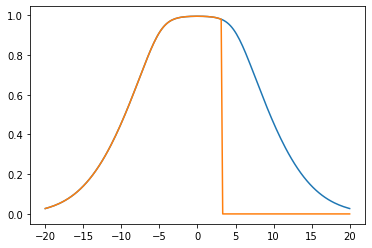

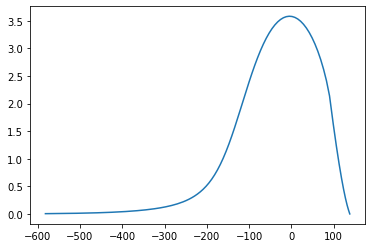

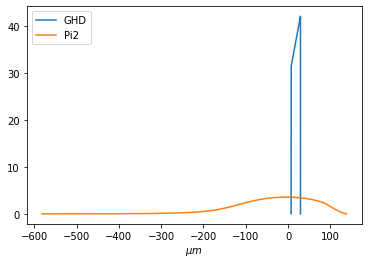

NameError: name 'result' is not defined

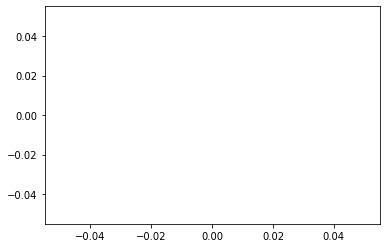

In [21]:
filename = f"{date}/density_expansion_nu_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{liste_t[-1]:.3f}.npz"
print ( 'filename =' ,filename )
x_exp , y_exp = np.load(filename)

filename = f"{date}/rho_{nom1[:index_last_underscore]}_discr_{nom1[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
print ( 'filename =' ,filename )
rho = np.load(filename)

filename = f"{date}/rho_{nom2[:index_last_underscore]}_discr_moy_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}.npz"
print ( 'filename =' ,filename )
Pi = np.load(filename)

filename = f"{date}/Pi_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz"
print ( 'filename =' ,filename )
Pi2 = np.load(filename)*Taille

filename = f"{date}/density_expansion_nu_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{liste_t[0]:.3f}.npz"
print ( 'filename =' ,filename )
x_exp , y_exp = np.load(filename)

f_theta_discr = interp1d(veff_bord_discr, theta_discr, kind='linear', bounds_error=False, fill_value="extrapolate")
theta_s = f_theta_discr(x0/Temp_bord) 

nu0 = np.load(f"{date}/nu_discr_{nom1[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz" ) 
plt.plot(theta_discr , nu0 ) 
nu = np.where ( theta_discr < theta_s ,nu0 , 0 ) 
plt.plot(theta_discr , nu )
plt.show()

plt.plot(theta_discr_exp*liste_t[-1]+x0, Pi2/liste_t[-1] , label = "Pi2")
plt.show()

rho2 = 0.5 / np.pi * nu* mass/hbar* dress(gbar, theta_discr, nu, np.ones(len(theta_discr)))

  
plt.plot(x_exp*Taille , y_exp  , label = "GHD")

#plt.plot(theta_discr*liste_t[-1]+x0, rho*Taille/liste_t[-1] , label = "rho")
#plt.plot(theta_discr*liste_t[-1]+x0, rho2*Taille/liste_t[-1] , label = "rho2")

#plt.plot(theta_discr*liste_t[-1]+x0, (rho-rho2)*Taille/liste_t[-1] , label = "---")

#plt.plot(theta_discr*liste_t[-1]+x0, Pi/liste_t[-1] , label = "Pi")

#plt.plot(theta_discr_exp_2*liste_t[-1]+x0, PI[0]/liste_t[-1] , label = f"Pi : {0:.3f}") 

plt.plot(theta_discr_exp*liste_t[-1]+x0, Pi2/liste_t[-1] , label = "Pi2")
#plt.plot(veff_bord_discr_exp_2*Temp_bord, Ghd , label = f"Ghd : {t:.3f}") 
plt.xlabel(r"$\mu m$")
plt.ylabel(r"")
plt.legend()
plt.show()



PI , GHD , N  = np.array(PI) , np.array(GHD) , np.array(N)
plt.plot(liste_t[mask], (N-N[0])/N[0]*100 , label = f"nat")  
plt.axhline((result-N[0])/N[0]*100 , color="black" , label = f"Pi") 
plt.xlabel(r"$ms$")
plt.ylabel(r"")
plt.legend()
plt.show()


dtheta = np.diff(theta_discr_exp)  # Différences des x
weights = np.append(dtheta, dtheta[-1])  # Ajouter le dernier poids pour le bord
result2 = np.sum(Pi2 * weights)  # Poids le long de l'axe 0

print(result2)

dtheta = np.diff(x_exp*Taille)  # Différences des x
weights = np.append(dtheta, dtheta[-1])  # Ajouter le dernier poids pour le bord
result1 = np.sum(y_exp * weights)  # Poids le long de l'axe 0

print(result1)




filename = 2025-01-27/bord1_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz
filename = 2025-01-27/bord2_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz
filename = 2025-01-27/Pi_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz
filename = 2025-01-27/density_expansion_nu_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_0.000.npz
filename = 2025-01-27/bord1_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_1.000.npz
filename = 2025-01-27/bord2_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_1.000.npz
filename = 2025-01-27/Pi_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_1.000.npz
filename = 2025-01-27/density_expansion_nu_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_1.000.npz
filename = 2025-01-27/bord1_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_10.000.npz
filename = 2025-01-27/bord2_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_10.000.npz
filename = 2025-01-27/Pi_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_10.000.npz
filename = 2025-01-27/density_

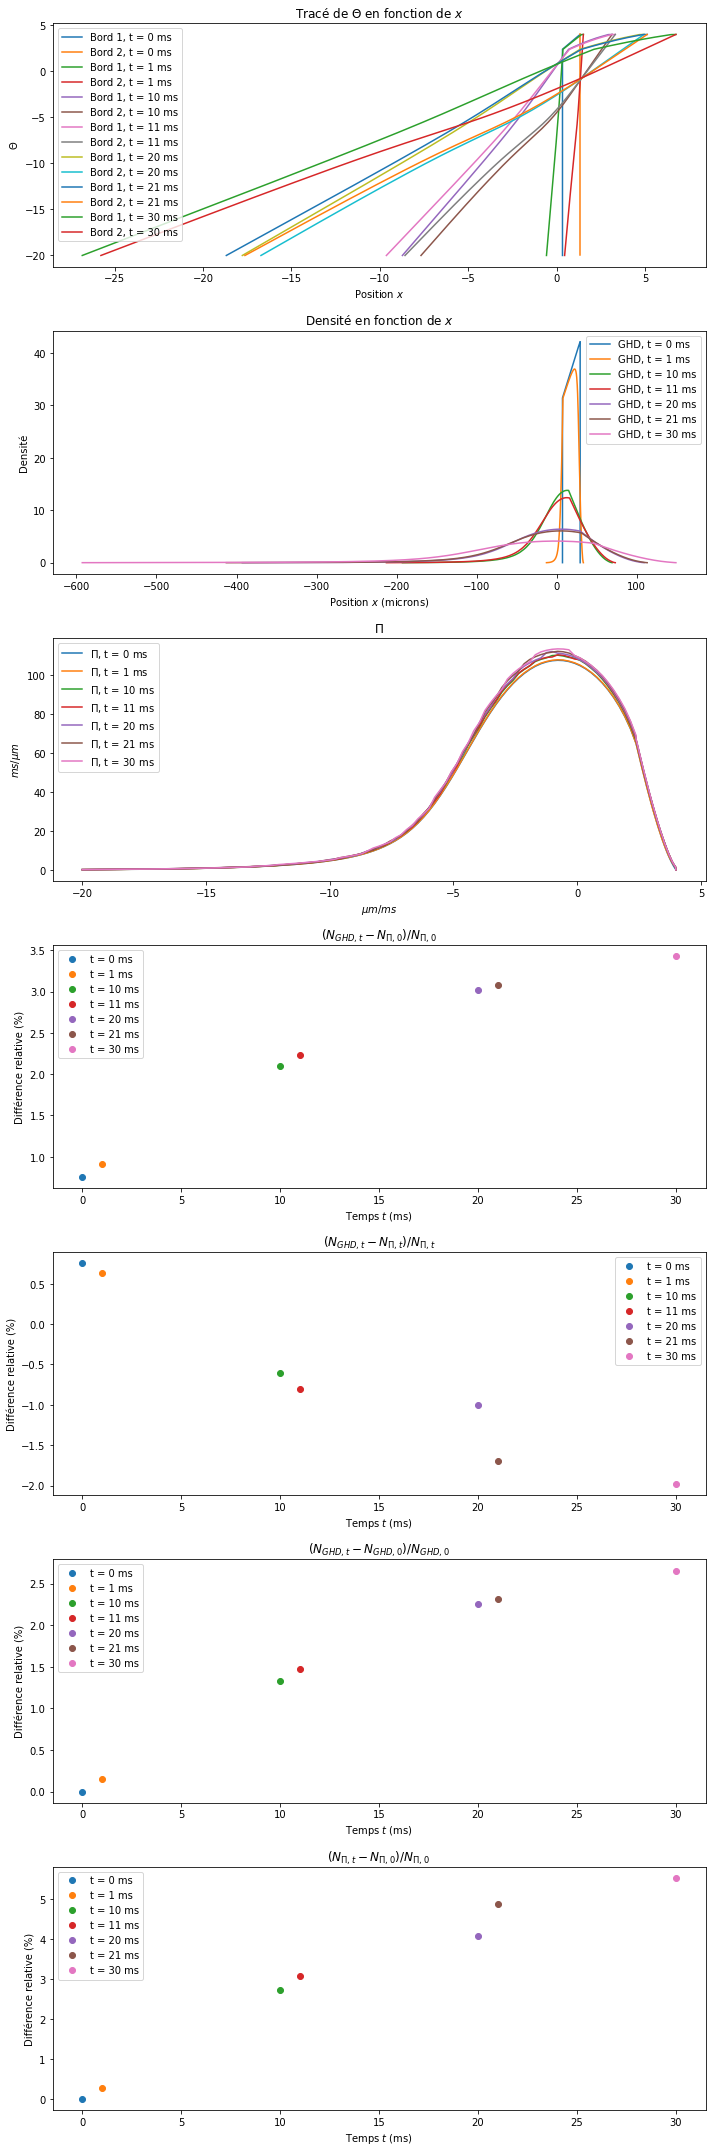

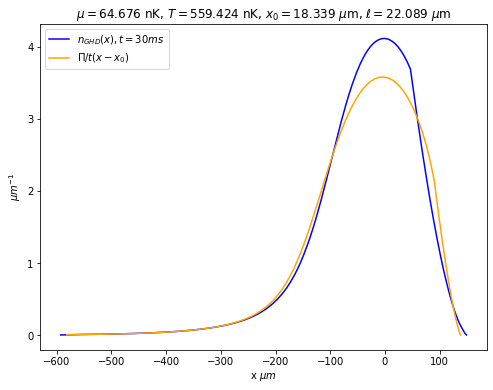

[-20.         -19.77398602 -19.54797205 -19.32195807 -19.0959441
 -18.86993012 -18.64391615 -18.41790217 -18.1918882  -17.96587422
 -17.73986025 -17.51384627 -17.28783229 -17.06181832 -16.83580434
 -16.60979037 -16.38377639 -16.15776242 -15.93174844 -15.70573447
 -15.47972049 -15.25370652 -15.02769254 -14.80167856 -14.57566459
 -14.34965061 -14.12363664 -13.89762266 -13.67160869 -13.44559471
 -13.21958074 -12.99356676 -12.76755279 -12.54153881 -12.31552484
 -12.08951086 -11.86349688 -11.63748291 -11.41146893 -11.18545496
 -10.95944098 -10.73342701 -10.50741303 -10.28139906 -10.05538508
  -9.82937111  -9.60335713  -9.37734315  -9.15132918  -8.9253152
  -8.69930123  -8.47328725  -8.24727328  -8.0212593   -7.79524533
  -7.56923135  -7.34321738  -7.1172034   -6.89118942  -6.66517545
  -6.43916147  -6.2131475   -5.98713352  -5.76111955  -5.53510557
  -5.3090916   -5.08307762  -4.85706365  -4.63104967  -4.40503569
  -4.17902172  -3.95300774  -3.72699377  -3.50097979  -3.27496582
  -3.0489518

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def cal_int(x, y):
    """Calcule l'intégrale discrète par une méthode des trapèzes pondérée."""
    dx = np.diff(x)  # Différences des x
    weights = np.append(dx, dx[-1])  # Ajouter le dernier poids pour le bord
    return np.sum(y * weights)  # Somme pondérée des y

# Liste des temps
liste_t = np.array([0.000, 1.000, 10.000, 11.000, 20.000, 21.000, 30.000])

Pi_0 = np.load(f"{date}/Pi_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz") * Taille

x_0, dens_0 = np.load(f"{date}/density_expansion_nu_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{0:.3f}.npz")

# Initialisation des figures pour les 3 graphiques
plt.figure(figsize=(10, 30))
fig_theta = plt.subplot(7, 1, 1)  # 1er graphique : theta(x)
fig_density = plt.subplot(7, 1, 2)  # 2e graphique : densité(x)
fig_Pi = plt.subplot(7, 1, 3)  # 2e graphique : densité(x)
fig_integral_diff = plt.subplot(7, 1, 4)  # 3e graphique : différence relative des intégrales
fig_integral_diff2 = plt.subplot(7, 1, 5)  # 3e graphique : différence relative des intégrales
fig_integral_diff3 = plt.subplot(7, 1, 6)  # 3e graphique : différence relative des intégrales
fig_integral_diff4 = plt.subplot(7, 1, 7)  # 3e graphique : différence relative des intégrales

# Boucle sur les temps
for t in liste_t:
    # Charger bord1
    filename_bord1 = f"{date}/bord1_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print('filename =', filename_bord1)
    bord1_t = np.load(filename_bord1)

    # Charger bord2
    filename_bord2 = f"{date}/bord2_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print('filename =', filename_bord2)
    bord2_t = np.load(filename_bord2)

    # Charger Pi
    filename_Pi = f"{date}/Pi_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print('filename =', filename_Pi)
    Pi_t = np.load(filename_Pi) * Taille

    

    # Charger densité
    filename_density = f"{date}/density_expansion_nu_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print('filename =', filename_density)
    x_t, dens_t = np.load(filename_density)

    # Tracé pour le graphique 1 : theta(x)
    fig_theta.plot(bord1_t, theta_discr_exp, label=f"Bord 1, t = {t:.0f} ms")
    fig_theta.plot(bord2_t, theta_discr_exp, label=f"Bord 2, t = {t:.0f} ms")

    # Tracé pour le graphique 2 : densité(x)
    fig_density.plot(x_t * Taille, dens_t, label=f"GHD, t = {t:.0f} ms")
    fig_Pi.plot(theta_discr_exp , Pi_t , label=f"$\Pi$, t = {t:.0f} ms")

    # Calcul de la différence relative des intégrales
    integral_diff = (
        cal_int(x_t * Taille, dens_t) - cal_int(theta_discr_exp, Pi_0)
    ) / cal_int(theta_discr_exp, Pi_0) * 100

    # Tracé pour le graphique 3 : intégrale vs temps
    fig_integral_diff.plot(t, integral_diff, "o", label=f"t = {t:.0f} ms")

    integral_diff = (
        cal_int(x_t * Taille, dens_t) - cal_int(theta_discr_exp, Pi_t)
    ) / cal_int(theta_discr_exp, Pi_t) * 100

    # Tracé pour le graphique 3 : intégrale vs temps
    fig_integral_diff2.plot(t, integral_diff, "o", label=f"t = {t:.0f} ms")

    integral_diff = (
        cal_int(x_t * Taille, dens_t) - cal_int(x_0 * Taille, dens_0)
    ) / cal_int(x_0 * Taille, dens_0) * 100

    # Tracé pour le graphique 3 : intégrale vs temps
    fig_integral_diff3.plot(t, integral_diff, "o", label=f"t = {t:.0f} ms")

    integral_diff = (
        cal_int(theta_discr_exp, Pi_t) - cal_int(theta_discr_exp, Pi_0)
    ) / cal_int(theta_discr_exp, Pi_0) * 100

    # Tracé pour le graphique 3 : intégrale vs temps
    fig_integral_diff4.plot(t, integral_diff, "o", label=f"t = {t:.0f} ms")

# Configuration des axes et des légendes pour les graphiques
fig_theta.set_xlabel("Position $x$")
fig_theta.set_ylabel(r"$\Theta$")
fig_theta.legend()
fig_theta.set_title("Tracé de $\Theta$ en fonction de $x$")

fig_density.set_xlabel("Position $x$ (microns)")
fig_density.set_ylabel("Densité")
fig_density.legend()
fig_density.set_title("Densité en fonction de $x$")

fig_Pi.set_xlabel(r"$\mu m/ms$")
fig_Pi.set_ylabel(r"$ms/\mu m$")
fig_Pi.legend()
fig_Pi.set_title(r"$\Pi$")

fig_integral_diff.set_xlabel("Temps $t$ (ms)")
fig_integral_diff.set_ylabel("Différence relative (%)")
fig_integral_diff.legend()
fig_integral_diff.set_title(f"$(N_{{GHD , t}} - N_{{\Pi , 0 }})/N_{{\Pi , 0 }}$ ")

fig_integral_diff2.set_xlabel("Temps $t$ (ms)")
fig_integral_diff2.set_ylabel("Différence relative (%)")
fig_integral_diff2.legend()
fig_integral_diff2.set_title(f"$(N_{{GHD , t}} - N_{{\Pi , t }})/N_{{\Pi , t }}$ ")

fig_integral_diff3.set_xlabel("Temps $t$ (ms)")
fig_integral_diff3.set_ylabel("Différence relative (%)")
fig_integral_diff3.legend()
fig_integral_diff3.set_title(f"$(N_{{GHD , t}} - N_{{GHD , 0 }})/N_{{GHD , 0 }}$ ")

fig_integral_diff4.set_xlabel("Temps $t$ (ms)")
fig_integral_diff4.set_ylabel("Différence relative (%)")
fig_integral_diff4.legend()
fig_integral_diff4.set_title(f"$(N_{{\Pi , t}} - N_{{\Pi , 0 }})/N_{{\Pi , 0 }}$ ")

# Affichage des graphiques
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))  # Crée une figure avec une taille définie

# Tracer les courbes
plt.plot(x_t * Taille, dens_t, label=f"$n_{{GHD}}(x), t = {t:.0f} ms$", color="blue")
plt.plot(theta_discr_exp * t + x0, Pi_0 / t, label=r"$\Pi/t ( x - x_0 )$", color="orange")

# Ajouter les labels et la légende
plt.xlabel(r"x $\mu m$")
plt.ylabel(r"${\mu m}^{-1}$")
plt.legend()

# Ajouter un titre
plt.title(f"$\mu = {mu}$ nK, $T = {T}$ nK, $x_0 = {x0}$ $\mu$m, $\ell = {Taille}$ $\mu$m")

# Afficher le graphique
plt.show()

print (theta_discr_exp)

filename = 2025-01-27/density_expansion_nu_theta_edge_1.0_ih2_64.676_559.424_18.339_22.089_30.000.npz
filename = 2025-01-27/rho_theta_edge_1.0_discr_ih1_64.676_559.424_18.339.npz
filename = 2025-01-27/rho_theta_edge_1.0_discr_moy_ih2_64.676_559.424_18.339_22.089.npz


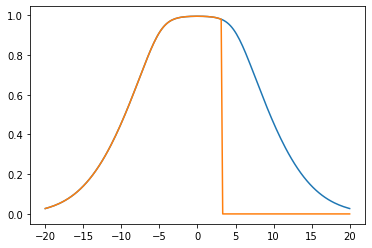

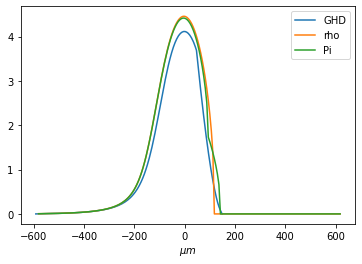

In [23]:
liste_t = [0.000 , 1.000 , 10.000 , 11.000 , 20.000 , 21.000 , 30.000 ] 

filename = f"{date}/density_expansion_nu_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{liste_t[-1]:.3f}.npz"
print ( 'filename =' ,filename )
x_exp , y_exp = np.load(filename)

filename = f"{date}/rho_{nom1[:index_last_underscore]}_discr_{nom1[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
print ( 'filename =' ,filename )
rho = np.load(filename)

filename = f"{date}/rho_{nom2[:index_last_underscore]}_discr_moy_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}.npz"
print ( 'filename =' ,filename )
Pi = np.load(filename)

f_theta_discr = interp1d(veff_bord_discr, theta_discr, kind='linear', bounds_error=False, fill_value="extrapolate")
theta_s = f_theta_discr(x0/Temp_bord) 

nu0 = np.load(f"{date}/nu_discr_{nom1[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz" ) 
plt.plot(theta_discr , nu0 ) 
nu = np.where ( theta_discr < theta_s ,nu0 , 0 ) 
plt.plot(theta_discr , nu )
plt.show()

  
plt.plot(x_exp*Taille , y_exp  , label = "GHD")

plt.plot(theta_discr*liste_t[-1]+x0, rho*Taille/liste_t[-1] , label = "rho")
plt.plot(theta_discr*liste_t[-1]+x0, Pi/liste_t[-1] , label = "Pi")
plt.xlabel(r"$\mu m$")
plt.ylabel(r"")
plt.legend()
plt.show()

In [24]:
print(len(mat_nu))

200


/tmp/ipykernel_414124/3271932725.py:24: RuntimeWarning: invalid value encountered in divide
  rho_s_1 = rho_1 / nu_discr


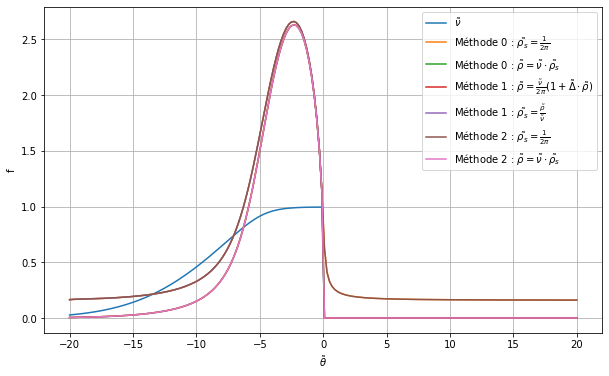

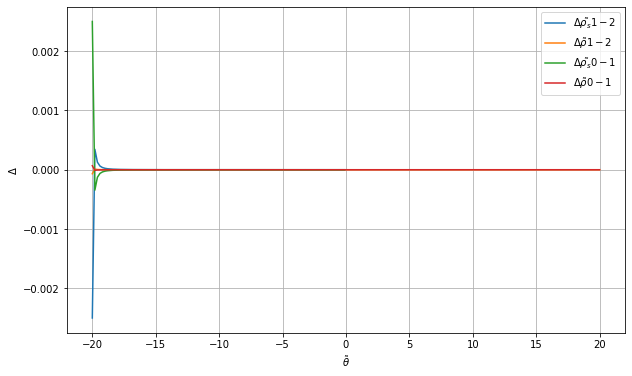

In [25]:
montrer_les_rho(theta_discr, mat_nu[-100], gbar)

In [26]:
mat_rho = np.array([0.5 / np.pi * nu* dress(gbar, theta_discr, nu, np.ones(len(theta_discr))) for nu in mat_nu ]  )

In [27]:
print(mat_rho)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.0043311  0.         0.         ... 0.         0.         0.        ]
 [0.00435128 0.00472302 0.         ... 0.         0.         0.        ]
 ...
 [0.00459793 0.00502371 0.0054507  ... 0.         0.         0.        ]
 [0.00459793 0.00502371 0.0054507  ... 0.00542121 0.         0.        ]
 [0.00459793 0.00502372 0.0054507  ... 0.00544643 0.005013   0.        ]]


TypeError: Shapes of x (600, 200) and z (200, 200) do not match

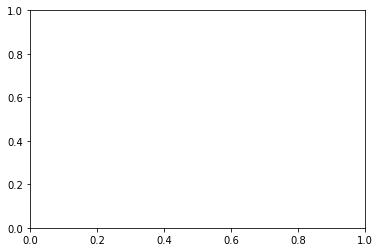

In [28]:
plt.contourf( X, Y,   mat_rho.T, cmap='viridis')
plt.plot(veff_bord_discr , theta_discr , label = "veff" )
plt.colorbar()  # Ajouter une barre de couleur pour l'échelle des valeurs
#plt.show()
plt.plot(veff_bord_discr , theta_veff_fun(veff_bord_discr) , label = "veff" )
plt.plot(x_bord, theta_discr , label = "x_borf/t")
plt.plot(bord1*Taille/Temp_bord , theta_discr_exp)
plt.plot(bord2*Taille/Temp_bord , theta_discr_exp)
plt.plot(x_exp*Taille/Temp_bord , np.concatenate([theta_discr_exp, theta_discr_exp], axis=0) , label = "GHD exp init")
plt.vlines(x_1, min(theta_discr), max(theta_discr), colors='w', label="x0 - Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
plt.vlines(x_2, min(theta_discr), max(theta_discr), colors='w', label="x0 + Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
#plt.xlim([0,2])
plt.xlabel(r"$\mu m/ms$")
plt.ylabel(r"$\mu m/ms$")
plt.legend()
plt.show()

In [ ]:
# Filtrer les indices correspondant à x_min <= x <= x_max

x_min, x_max =  x_1, x_2
mask = (X[0, :] >= x_min) & (X[0, :] <= x_max)
X_filtered = X[0, mask]
mat_rho_filtered = mat_rho[:, mask]

# Intégration sur la plage spécifiée
rho_integrated_filtered = np.trapz(mat_rho_filtered, x=X_filtered, axis=1)

# Affichage du résultat
plt.plot(Y[:, 0], rho_integrated_filtered, label=r"$\int_{x_{\min}}^{x_{\max}} \rho(x, \theta) dx$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\int_{x_{\min}}^{x_{\max}} \rho(x, \theta) dx$")
plt.title(r"Intégrale restreinte de $\rho(x, \theta)$ sur $x$")
plt.legend()
plt.grid()
plt.show()

In [ ]:
mat_rho_filtered = np.array([mat_rho[i]*mask[i] for i in range(len(mask))])

#plt.contourf( X, Y,   mat_rho.T, cmap='viridis')
plt.contourf( X, Y,   mat_rho_filtered.T, cmap='viridis')
plt.plot(veff_bord_discr , theta_discr , label = "veff" )
plt.colorbar()  # Ajouter une barre de couleur pour l'échelle des valeurs
#plt.show()
plt.plot(veff_bord_discr , theta_veff_fun(veff_bord_discr) , label = "veff" )
plt.plot(x_bord, theta_discr , label = "x_borf/t")
plt.plot(bord1*Taille/Temp_bord , theta_discr_exp)
plt.plot(bord2*Taille/Temp_bord , theta_discr_exp)
plt.plot(x_exp*Taille/Temp_bord , np.concatenate([theta_discr_exp, theta_discr_exp], axis=0) , label = "GHD exp init")
plt.vlines(x_1, min(theta_discr), max(theta_discr), colors='w', label="x0 - Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
plt.vlines(x_2, min(theta_discr), max(theta_discr), colors='w', label="x0 + Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
#plt.xlim([0,2])
plt.xlabel(r"$\mu m/ms$")
plt.ylabel(r"$\mu m/ms$")
plt.legend()
plt.show()

rho_integrated_filtered = np.trapz(mat_rho_filtered, x=veff_bord_discr, axis=1)

rho_integrated_filtered = np.trapz(mat_rho_filtered, x=theta_discr, axis=0)

# Affichage du résultat
plt.plot(Y[:, 0], rho_integrated_filtered, label=r"$\int_{x_{\min}}^{x_{\max}} \rho(x, \theta) dx$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\int_{x_{\min}}^{x_{\max}} \rho(x, \theta) dx$")
plt.title(r"Intégrale restreinte de $\rho(x, \theta)$ sur $x$")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator

# Création de l'interpolateur
f = RegularGridInterpolator((veff_bord_discr, theta_discr), mat_nu, bounds_error=False, fill_value=None)

# Calcul d'une valeur unique
point = (-20.0, -20.0)
result = f(point)
print(f"f(-20.0, -20.0) = {result}")

# Calcul sur toutes les combinaisons de (veff_bord_discr, theta_discr)
V, Theta = np.meshgrid(veff_bord_discr, theta_discr, indexing="ij")  # Grille
f_mat_nu = f((V, Theta))  # Évaluation sur la grille

print("Matrice interpolée f_mat_nu :")
print(f_mat_nu)

In [ ]:
import numpy as np

def norme(x, p=2):
    """
    Calcule la norme p d'un vecteur x.
    
    Arguments :
        x : array-like
            Le vecteur dont on calcule la norme.
        p : int, float, ou str ('inf')
            L'exposant de la norme. Par défaut, p=2.
            - Si p=0, retourne 0 si tous les éléments sont nuls, sinon inf.
            - Si p='inf' ou np.inf, retourne la norme infinie (valeur maximale absolue).
    
    Retourne :
        float : La norme p du vecteur.
    """
    x = np.array(x)  # Convertit en tableau numpy pour une meilleure manipulation
    
    if p == 0:
        # Norme 0 : retourne inf si un élément est non nul, sinon 0
        return np.inf if np.any(np.abs(x) > 0) else 0
    elif p == np.inf or p == 'inf':
        # Norme infinie : maximum absolu
        return np.max(np.abs(x))
    elif p > 0:
        # Norme p : norme classique pour p > 0
        return np.power(np.sum(np.power(np.abs(x), p)), 1 / p)
    else:
        raise ValueError("La valeur de p doit être >= 0 ou 'inf'.")

print( norme(f_mat_nu-mat_nu, p=np.inf))
print( norme(f_mat_nu, p=np.inf))
print( norme(mat_nu, p=np.inf))

In [ ]:
#bord1_theta_edge_1.0_ih2_64.677_559.424_18.339_22.171_30.000.npz
#bord1_theta_edge_1.0_ih2_64.677_559.424_18.339_22.171_20.000.npz
#bord1_theta_edge_1.0_ih2_64.677_559.424_18.339_22.171_1.000.npz
#bord1_theta_edge_1.0_ih2_64.677_559.424_18.339_22.171_21.000.npz
#bord1_theta_edge_1.0_ih2_64.677_559.424_18.339_22.171_11.000.npz
#bord1_theta_edge_1.0_ih2_64.677_559.424_18.339_22.171_10.000.npz
#bord1_theta_edge_1.0_ih2_64.677_559.424_18.339_22.171_0.000.npz

liste_t = [0.000 , 1.000 , 10.000 , 11.000 , 20.000 , 21.000 , 30.000 ] 
for t in liste_t[:] :
    filename = f"{date}/bord1_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print ( 'filename =' ,filename )
    bord1 = np.load(filename)
    filename = f"{date}/bord2_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print ( 'filename =' ,filename )
    bord2 = np.load(filename)
    
    plt.plot(np.concatenate([bord1, np.flip(bord2)], axis=0)*Taille/Temp_bord , np.concatenate([theta_discr_exp, np.flip(theta_discr_exp)], axis=0) , label = str(t) )

plt.legend()
plt.show()


In [ ]:
import numpy as np
from scipy.interpolate import interp1d

# Création de la fonction interpolée
# Méthode d'interpolation linéaire (par défaut)
f_theta_discr_exp_1 = interp1d(bord1*Taille/Temp_bord, theta_discr_exp, kind='linear', bounds_error=False, fill_value="extrapolate")

f_theta_discr_exp_2 = interp1d(bord2*Taille/Temp_bord, theta_discr_exp, kind='linear', bounds_error=False, fill_value="extrapolate")

#plt.plot(bord1*Taille/Temp_bord , theta_discr_exp)
#plt.plot(bord2*Taille/Temp_bord , theta_discr_exp)
plt.plot(bord1*Taille/Temp_bord , f_theta_discr_exp_1(bord1*Taille/Temp_bord))
plt.plot(bord2*Taille/Temp_bord , f_theta_discr_exp_2(bord2*Taille/Temp_bord))
f_theta_discr_exp_2

plt.grid()
plt.show()


In [ ]:

    

print( f_mat_nu_bord(1 , 1) )


PI , GHD , N  = [] , [] , [] 
liste_t = [0.000 , 1.000 , 10.000 , 11.000 , 20.000 , 21.000 , 30.000 ] 
for t in liste_t[-1:] :
    filename = f"{date}/bord1_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print ( 'filename =' ,filename )
    bord1 = np.load(filename)
    filename = f"{date}/bord2_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print ( 'filename =' ,filename )
    bord2 = np.load(filename)
    
    veff_bord_discr_exp_2 = np.linspace(min(bord1[0]*Taille/Temp_bord , veff_bord_discr[0]) , max(bord2[-1]*Taille/Temp_bord , veff_bord_discr[-1]), 400)
    theta_discr_exp_2 = np.linspace(min(theta_discr_exp[0] , theta_discr[0]) , max(theta_discr_exp[-1] , theta_discr[-1]), 400)
    mat_nu_bord = np.array([
        np.array([f_mat_nu_bord(v, theta , v1 = bord1*Taille/Temp_bord , v2 = bord1*Taille/Temp_bord ) for theta in theta_discr_exp_2])
        for v in veff_bord_discr_exp_2
    ])  

    X, Y = np.meshgrid(veff_bord_discr, theta_discr)
    plt.contourf( X, Y,   mat_nu.T, cmap='viridis' , alpha = 0.5)
    X, Y = np.meshgrid(veff_bord_discr_exp_2, theta_discr_exp_2)
    plt.contourf( X, Y,   mat_nu_bord.T, cmap='viridis' , alpha = 0.5)
    plt.plot(veff_bord_discr , theta_discr , label = "veff" )
    plt.colorbar()  # Ajouter une barre de couleur pour l'échelle des valeurs
    #plt.show()
    plt.plot(veff_bord_discr , theta_veff_fun(veff_bord_discr) , label = "veff" )
    
    plt.plot(bord1*Taille/Temp_bord , theta_discr_exp)
    plt.plot(bord2*Taille/Temp_bord , theta_discr_exp)
    plt.plot(np.concatenate([bord1, np.flip(bord2)], axis=0)*Taille/Temp_bord , np.concatenate([theta_discr_exp, np.flip(theta_discr_exp)], axis=0) , color = "white" , label = str(t) )
    
    plt.vlines(x_1, min(theta_discr), max(theta_discr), colors='w', label="x0 - Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    plt.vlines(x_2, min(theta_discr), max(theta_discr), colors='w', label="x0 + Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.xlim([0,2])
    plt.xlabel(r"$\mu m/ms$")
    plt.ylabel(r"$\mu m/ms$")
    plt.legend()
    plt.show()

    mat_rho_bord = np.array([0.5 / np.pi * nu* dress(gbar, theta_discr_exp_2, nu, np.ones(len(theta_discr_exp_2))) for nu in mat_nu_bord ]  )

    #plt.contourf( X, Y,   mat_rho.T, cmap='viridis' , alpha = 0.5)
    plt.contourf( X, Y,   mat_rho_bord.T, cmap='viridis' , alpha = 0.9)
    plt.plot(veff_bord_discr , theta_discr , label = "veff" )
    plt.colorbar()  # Ajouter une barre de couleur pour l'échelle des valeurs
    plt.plot(np.concatenate([bord1, np.flip(bord2)], axis=0)*Taille/Temp_bord , np.concatenate([theta_discr_exp, np.flip(theta_discr_exp)], axis=0) , color = "white" , label = str(t) )
    
    plt.vlines(x_1, min(theta_discr), max(theta_discr), colors='w', label="x0 - Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    plt.vlines(x_2, min(theta_discr), max(theta_discr), colors='w', label="x0 + Taille/2", linestyle='--', linewidth=2 , alpha = 0.2)
    #plt.xlim([0,2])
    plt.xlabel(r"$\mu m/ms$")
    plt.ylabel(r"$\mu m/ms$")
    plt.legend()
    plt.show()

    Pi = integral_axis1 = integ(veff_bord_discr_exp_2, theta_discr_exp_2, mat_rho_bord, axes=(0,))
    Ghd = integral_axis1 = integ(veff_bord_discr_exp_2, theta_discr_exp_2, mat_rho_bord, axes=(1,))
    nat = integral_axis1 = integ(veff_bord_discr_exp_2, theta_discr_exp_2, mat_rho_bord, axes=(0,1))

    PI.append(Pi)
    GHD.append(Ghd)
    N.append(nat)

    plt.plot(theta_discr_exp_2 , Pi , label = f"Pi : {t:.3f}") 
    plt.xlabel(r"$\mu m/ms$")
    plt.ylabel(r"")
    plt.legend()
    plt.show()

    plt.plot(veff_bord_discr_exp_2 , Ghd , label = f"GHD : {t:.3f}") 
    plt.xlabel(r"$\mu m/ms$")
    plt.ylabel(r"")
    plt.legend()
    plt.show()

    plt.plot(theta_discr_exp_2, PI[0] , label = f"Pi : {0:.3f}") 
    plt.plot(veff_bord_discr_exp_2, Ghd , label = f"Ghd : {t:.3f}") 
    plt.xlabel(r"$\mu m/ms$")
    plt.ylabel(r"")
    plt.legend()
    plt.show()
    

In [ ]:
filename = f"{date}/density_expansion_nu_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{liste_t[-1]:.3f}.npz"
print ( 'filename =' ,filename )
x_exp , y_exp = np.load(filename)

plt.plot(theta_discr_exp_2, PI[0] ) 
#plt.plot(veff_bord_discr_exp_2, GHD[-1] ) 
#plt.plot(veff_bord_discr_exp_2/(t/Temp_bord), GHD[-1]*t/Temp_bord )
plt.plot(x_exp*Taille/t , y_exp )
plt.xlabel(r"$\mu m/ms$")
plt.ylabel(r"")
plt.legend()
plt.show()

In [ ]:
index_last_underscore = nom2.rfind('_')
theta_discr = np.load(f"{date}/theta_discr_{nom2[index_last_underscore+1:]}.npz")
nu0 = np.load(f"{date}/nu_discr_{nom1[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz" ) 
liste_t = [0.000 , 1.000 , 10.000 , 11.000 , 20.000 , 21.000 , 30.000 ] 
for t in liste_t[-1:] :
    filename = f"{date}/bord1_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print ( 'filename =' ,filename )
    bord1 = np.load(filename)
    filename = f"{date}/bord2_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    print ( 'filename =' ,filename )
    bord2 = np.load(filename)

n_fun = interp1d(theta_discr ,nu0 , kind='linear', fill_value="extrapolate")

x , y = eval_density(bord1, bord2, gbar, theta_discr , n_fun, mass/hbar)


In [ ]:
liste_t = [0.000 , 1.000 , 10.000 , 11.000 , 20.000 , 21.000 , 30.000 ] 

filename = f"{date}/density_expansion_nu_{nom2}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{liste_t[-1]:.3f}.npz"
print ( 'filename =' ,filename )
x_exp , y_exp = np.load(filename)

filename = f"{date}/rho_{nom1[:index_last_underscore]}_discr_{nom1[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
print ( 'filename =' ,filename )
rho = np.load(filename)

filename = f"{date}/rho_{nom2[:index_last_underscore]}_discr_moy_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}.npz"
print ( 'filename =' ,filename )
Pi = np.load(filename)

f_theta_discr = interp1d(veff_bord_discr, theta_discr, kind='linear', bounds_error=False, fill_value="extrapolate")
theta_s = f_theta_discr(x0/Temp_bord) 

nu0 = np.load(f"{date}/nu_discr_{nom1[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz" ) 
plt.plot(theta_discr , nu0 ) 
nu = np.where ( theta_discr < theta_s ,nu0 , 0 ) 
plt.plot(theta_discr , nu )
plt.show()

  
rho2 = 0.5 / np.pi * nu* mass/hbar * dress(gbar, theta_discr, nu, np.ones(len(theta_discr)))

Pi2 = 0 
nbr = 10
x = np.linspace(x0-Taille/2, x0+Taille/2, nbr)
for i in range(nbr) :
    theta_s = f_theta_discr(x[i]/Temp_bord) 
    nu = np.where ( theta_discr < theta_s ,nu0 , 0 )
    Pi2 += 0.5 / np.pi * nu* mass/hbar * dress(gbar, theta_discr, nu, np.ones(len(theta_discr)))*Taille/nbr
plt.plot(x_exp*Taille , y_exp )
plt.plot(x*Taille , y  , label = "GHD 2")
plt.plot(theta_discr*liste_t[-1]+x0, rho*Taille/liste_t[-1] , label = "rho")
plt.plot(theta_discr*liste_t[-1]+x0, rho2*Taille/liste_t[-1] , label = "rho2")
plt.xlabel(r"$\mu m$")
plt.plot(theta_discr*liste_t[-1]+x0, Pi/liste_t[-1] , label = "Pi")
plt.plot(theta_discr*liste_t[-1]+x0, Pi2/liste_t[-1] , label = "Pi2")
plt.xlabel(r"$\mu m$")
plt.ylabel(r"")
plt.legend()
plt.show()